In [58]:
import pandas as pd
import numpy as np

import plotnine as p9

from predictability.utils import read_fasta
from predictability.constants import PROJECT_ROOT, DATA_ROOT
from predictability.plotting import assign_pretty_feature_names, color_mapping, feature_mapping

In [59]:
save_dir = PROJECT_ROOT / "results/figures"
save_dir.mkdir(exist_ok=True, parents=True)

In [60]:
np.random.seed(41)

In [61]:
amylase_reference = [sequence for key, sequence in read_fasta(DATA_ROOT / "amylase/reference.fasta").items()][0]
erk2_reference = [sequence for key, sequence in read_fasta(DATA_ROOT / "erk2/reference.fasta").items()][0]
model_dirs = ["pls", "potts", "rita", "rar"]

# Combis all models

In [104]:
combis_results_dir = PROJECT_ROOT / "results/amylase/combinatorials"
combis_results = pd.concat(
    [pd.read_csv(combis_results_dir / f"{model_dir}/scores.csv", index_col=False) for model_dir in model_dirs]
)
combis_results["belongs"] = combis_results["belongs"].astype(bool)
combis_results["Feature label"] = combis_results["belongs"].apply(lambda x: "Negative" if x==False else "Positive")
combis_results["Feature"] = combis_results["feature"].apply(assign_pretty_feature_names)
combis_results = combis_results.rename(columns={"spearman_val": "Test spearman"})

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 10 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/supervised_performance_difference.png


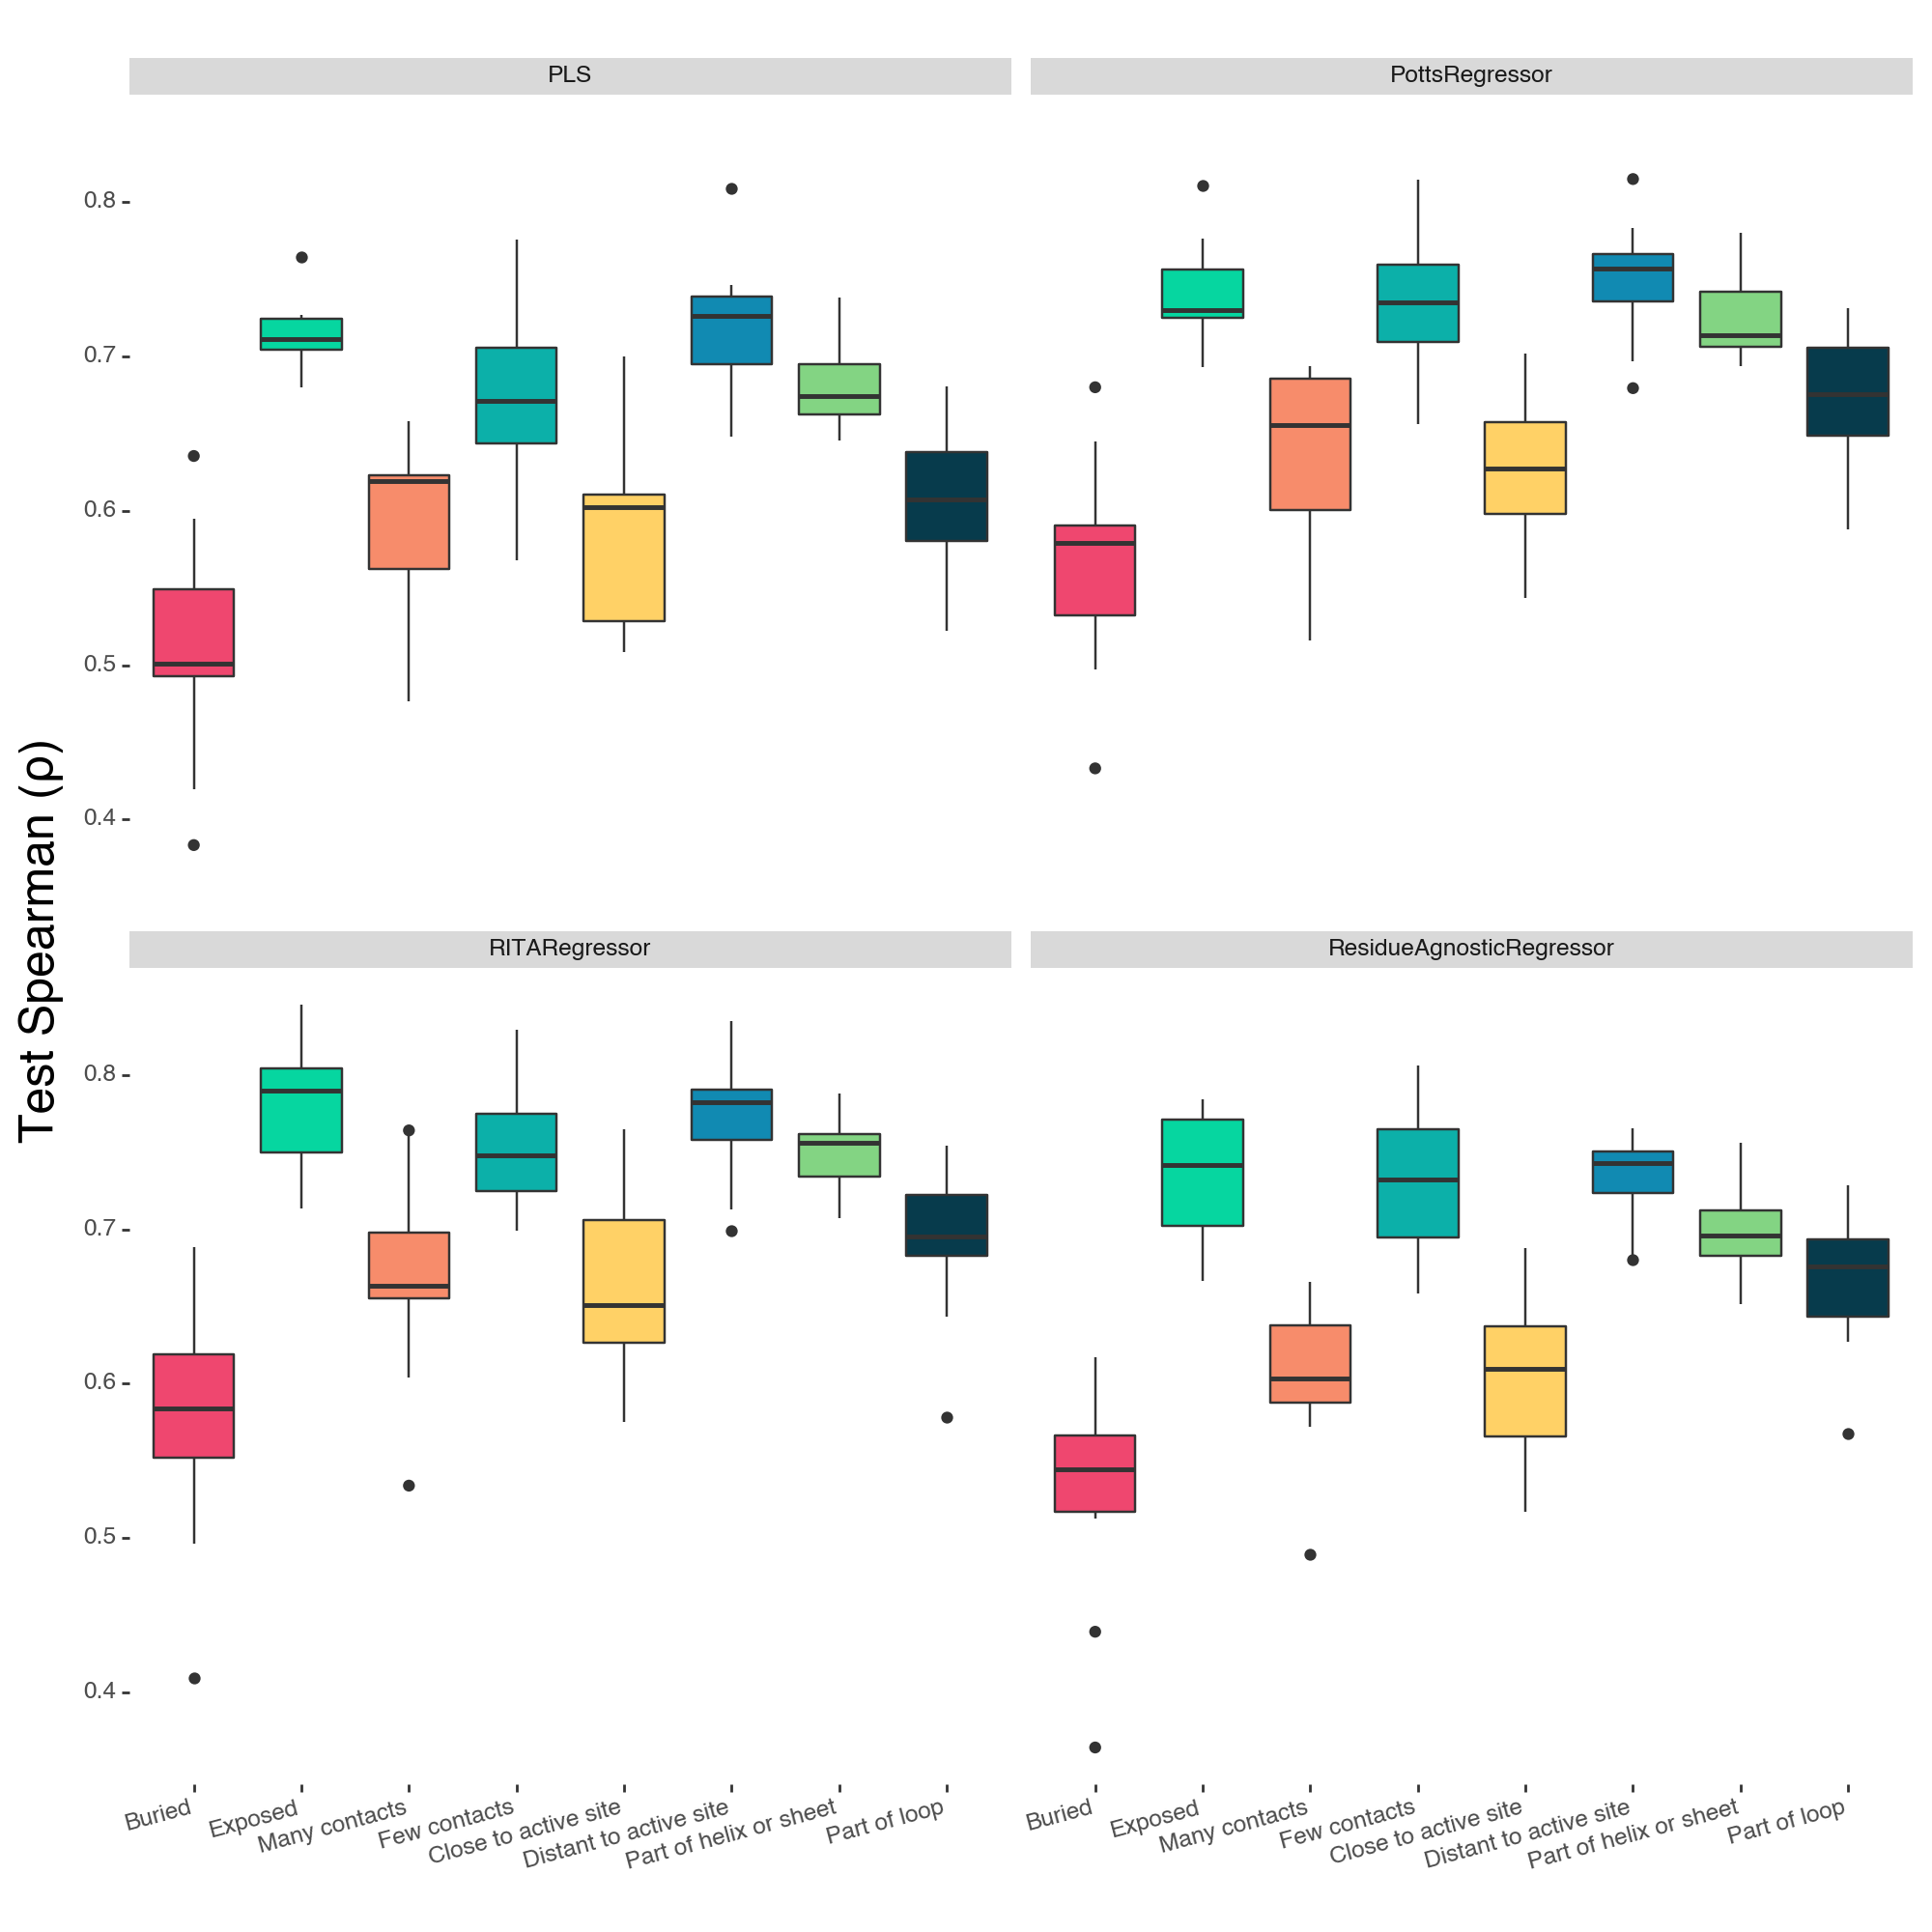

In [105]:
combis_results["Structural characteristic"] = combis_results[['Feature', 'Feature label']].apply(
    lambda x: feature_mapping[tuple(x)], axis=1
)
combis_results["Structural characteristic"] = pd.Categorical(combis_results["Structural characteristic"],
                                                     categories=["Buried", "Exposed", "Many contacts", "Few contacts",
                                                                 "Close to active site", "Distant to active site",
                                                                 "Part of helix or sheet", "Part of loop"],
                                                     ordered=True)

p = (
    p9.ggplot(
        combis_results,
        p9.aes(
            "Structural characteristic",
            "Test spearman",
            fill="Structural characteristic",
        )
    )
    + p9.geom_boxplot(show_legend=False)
    + p9.facet_wrap("model", nrow=2, ncol=2)
    + p9.theme(figure_size=(10, 10), axis_text_x=p9.element_text(rotation=15, ha="right"))
    + p9.scale_fill_manual(values=color_mapping)
    + p9.theme(
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white'),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
    )
    + p9.labs(x="")
)
p.draw()
p.save(save_dir / "supervised_performance_difference.png")
print(p)

# RITA regressor only

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 10 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/rita_performance_difference.png


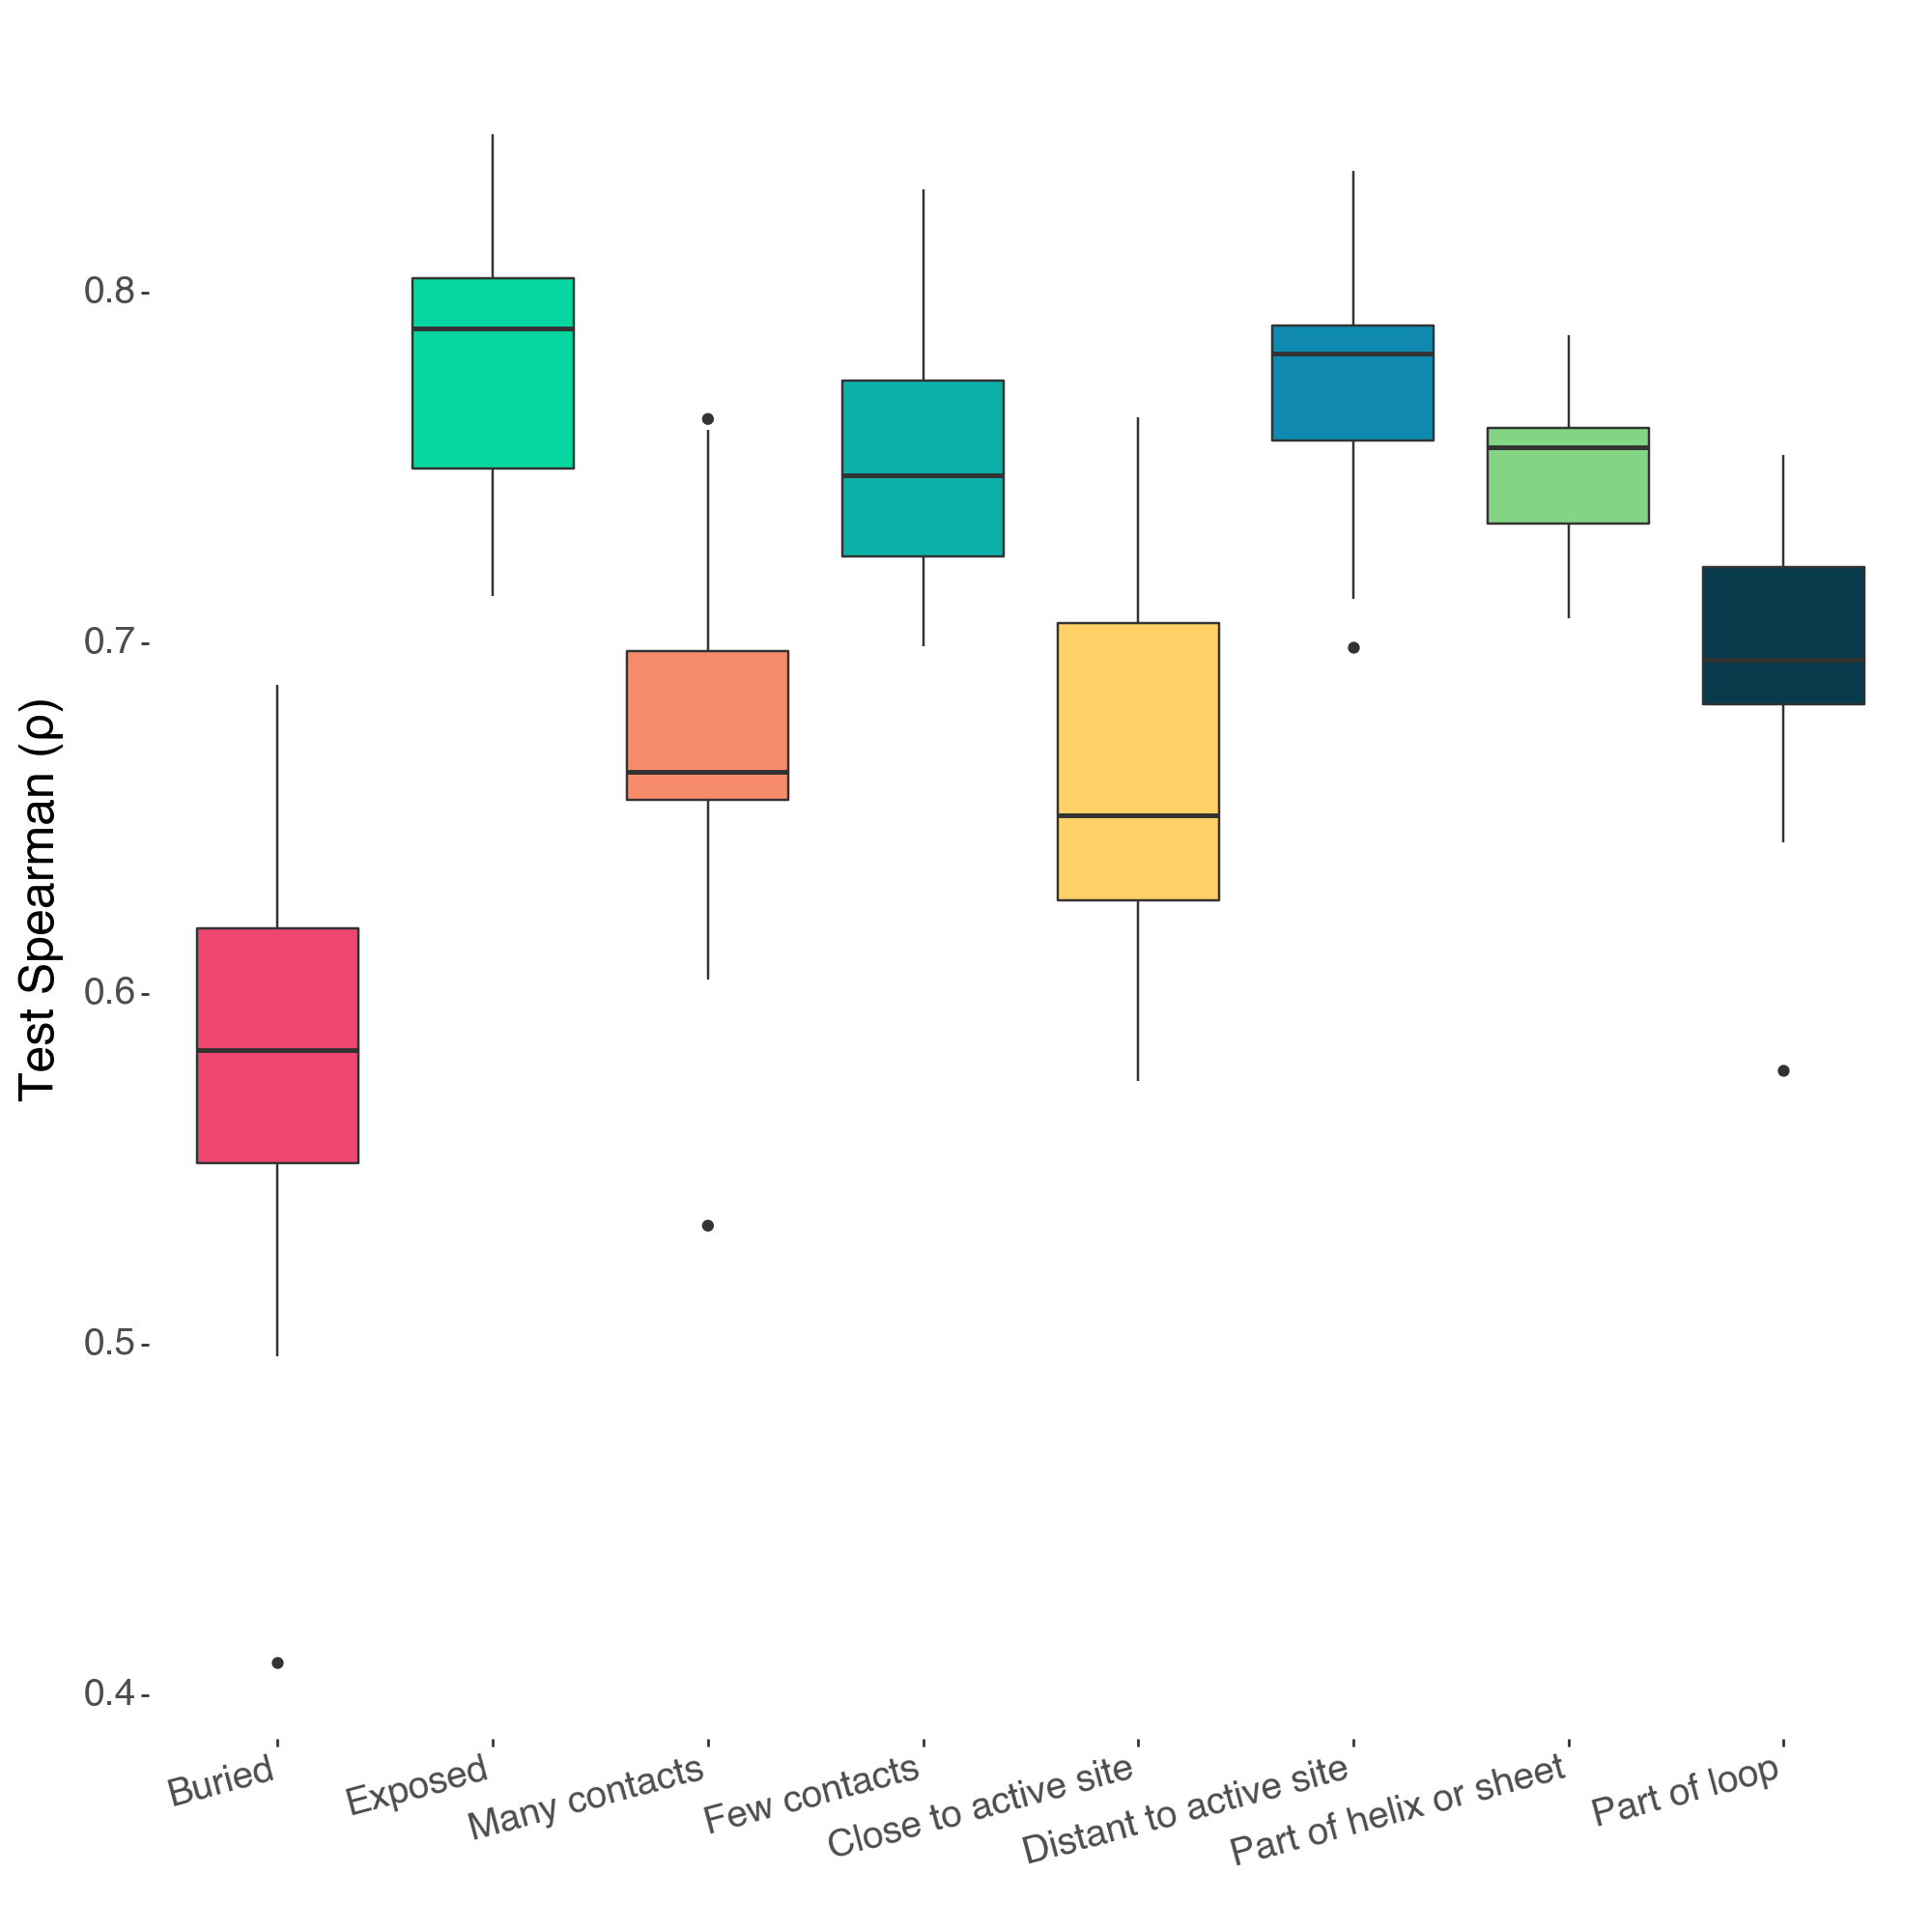

In [106]:
pls_results = combis_results[combis_results["model"] == "RITARegressor"]

p = (
    p9.ggplot(
        pls_results,
        p9.aes(
            "Structural characteristic",
            "Test spearman",
            fill="Structural characteristic",
        )
    )
    + p9.geom_boxplot(show_legend=False)
    + p9.theme(
        figure_size=(10, 10),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
        axis_title_x=p9.element_text(size=18),
        axis_text_x=p9.element_text(rotation=15, ha="right", size=14),
        axis_text_y=p9.element_text(size=14),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
    + p9.scale_fill_manual(values=color_mapping)
    + p9.labs(x="")
)
p.draw()
p.save(save_dir / "rita_performance_difference.png")
print(p)

# Singles all models

In [107]:
singles_results_dir = PROJECT_ROOT / "results/amylase/singles"
singles_results = pd.concat(
    [pd.read_csv(singles_results_dir / f"{model_dir}/scores.csv", index_col=False) for model_dir in model_dirs]
)
singles_results["belongs"] = singles_results["belongs"].astype(bool)
singles_results["Feature label"] = singles_results["belongs"].apply(lambda x: "Negative" if x==False else "Positive")
singles_results["Feature"] = singles_results["feature"].apply(assign_pretty_feature_names)
singles_results = singles_results.rename(columns={"spearman_val": "Test spearman"})

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 10 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/sel_performance_difference.png


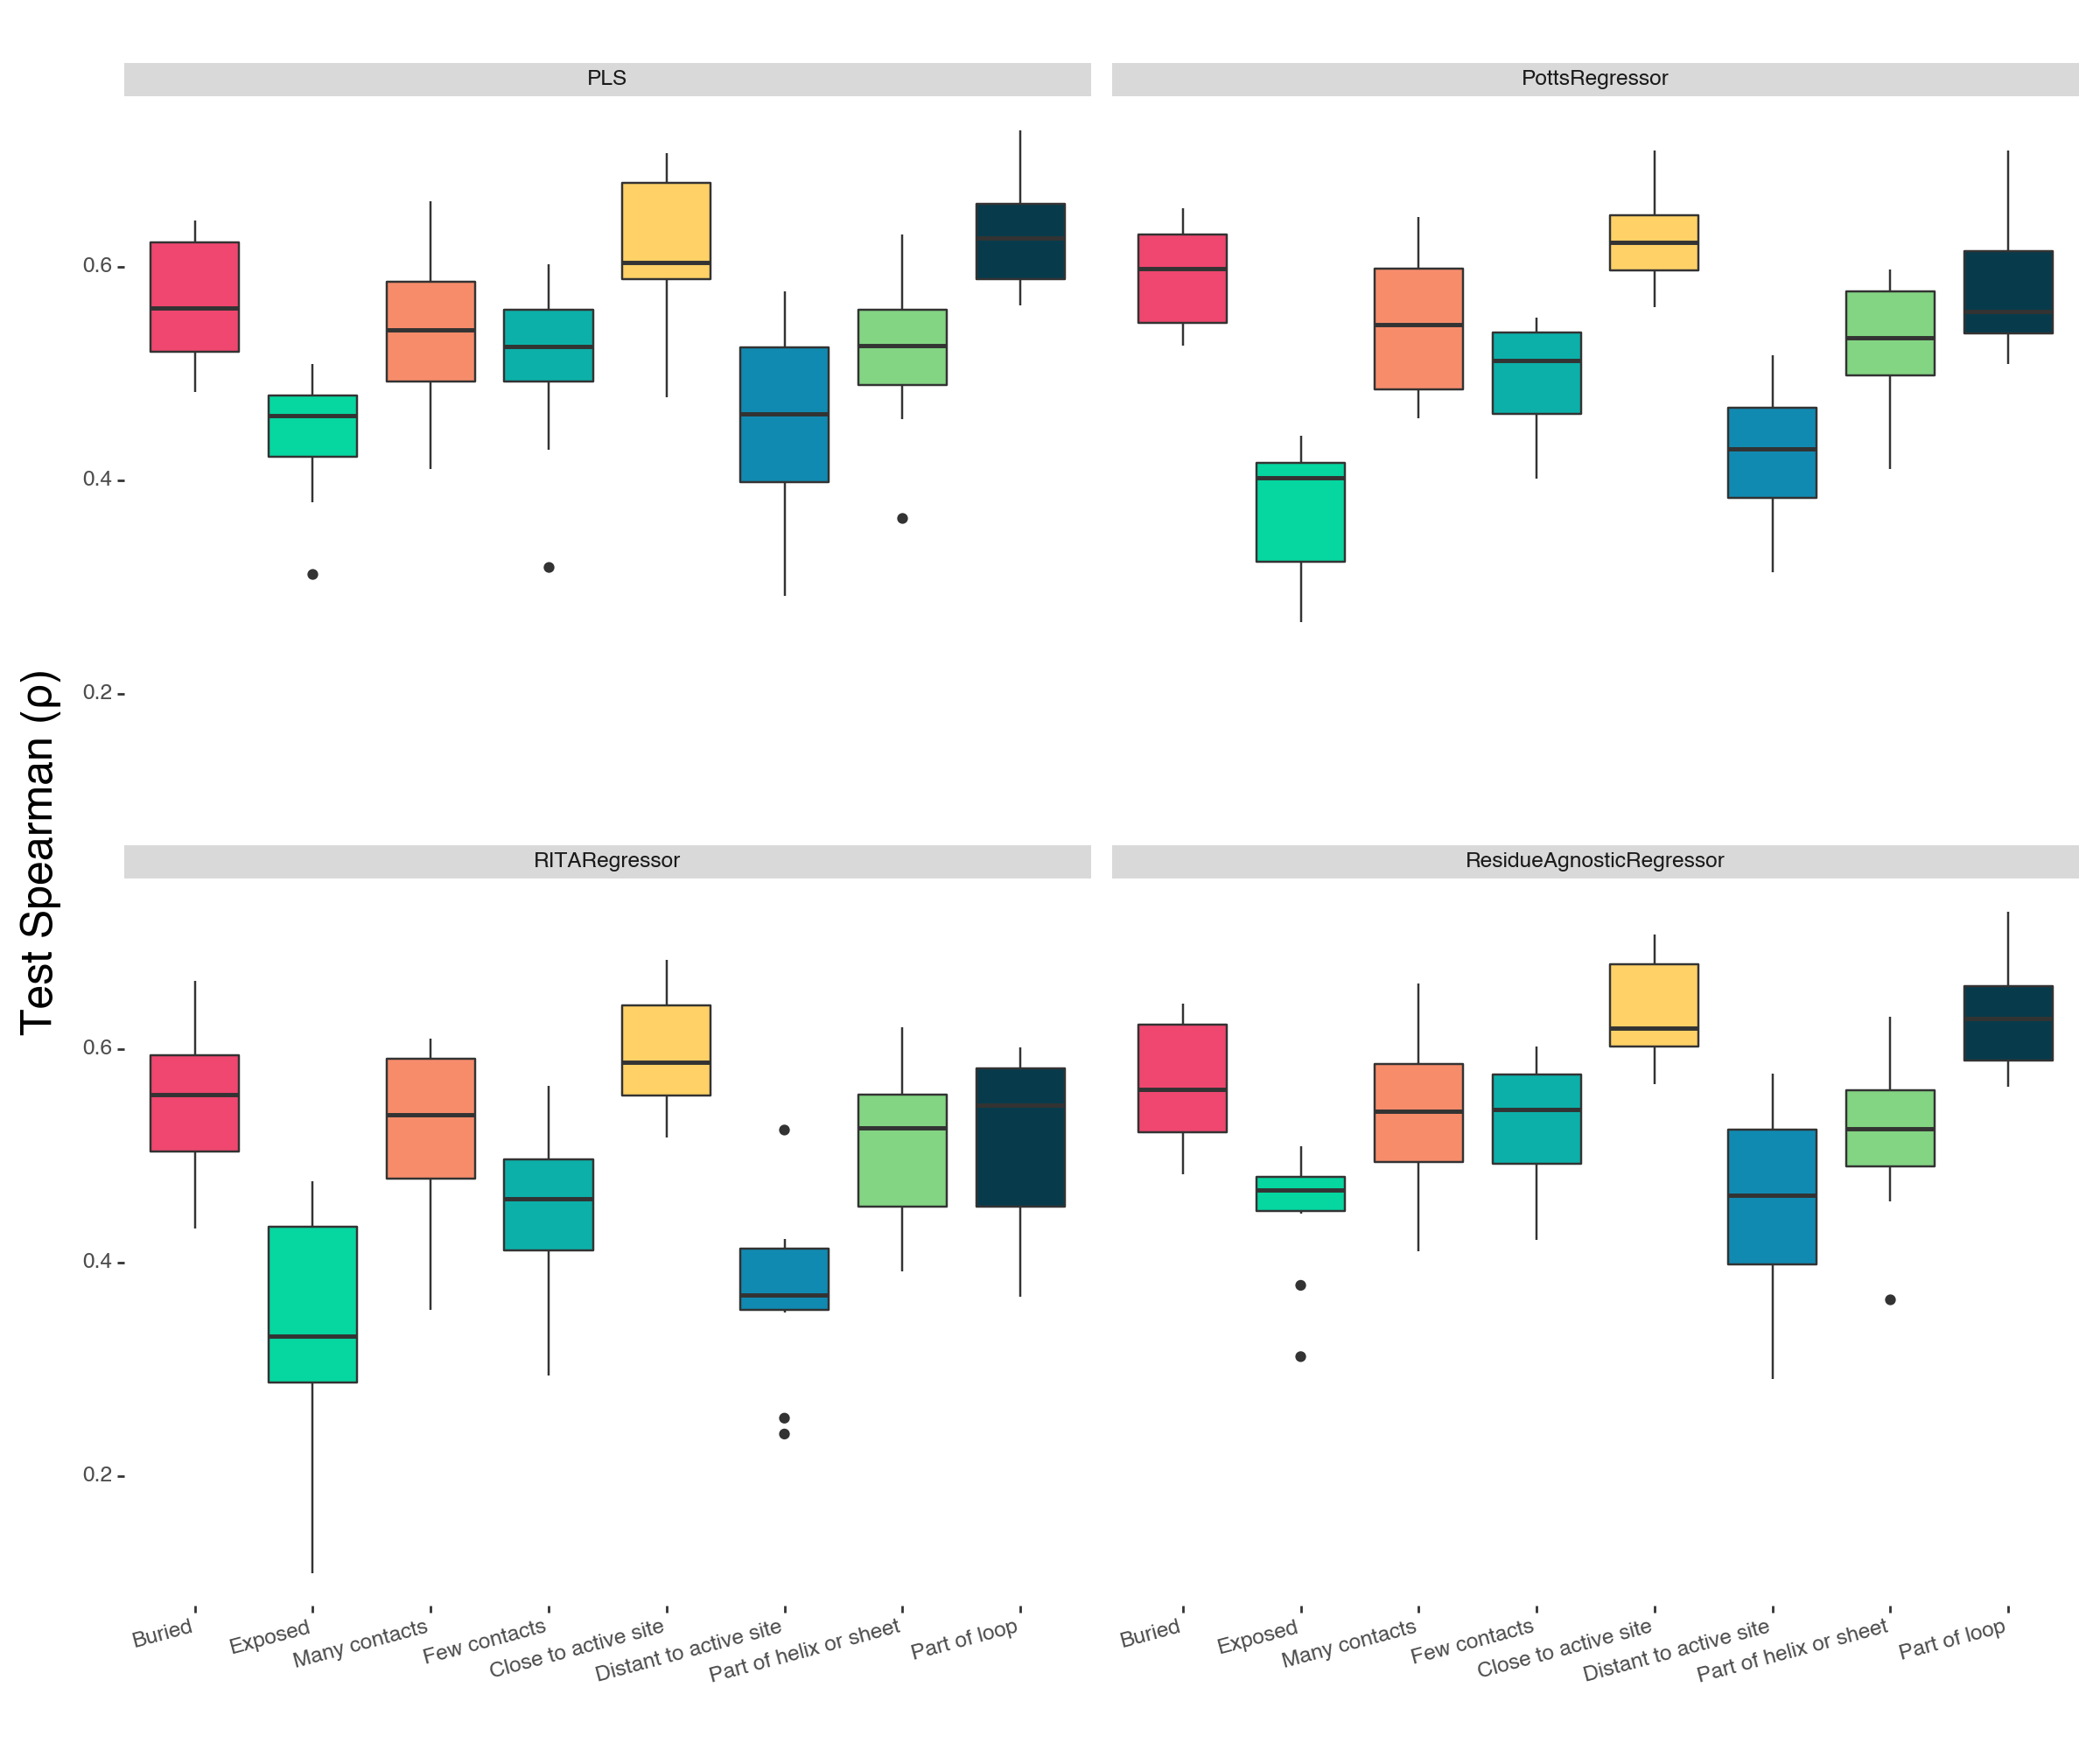

In [108]:
singles_results["Structural characteristic"] = singles_results[['Feature', 'Feature label']].apply(lambda x: feature_mapping[tuple(x)], axis=1)
singles_results["Structural characteristic"] = pd.Categorical(singles_results["Structural characteristic"],
                                                     categories=["Buried", "Exposed", "Many contacts", "Few contacts",
                                                                 "Close to active site", "Distant to active site",
                                                                 "Part of helix or sheet", "Part of loop"],
                                                     ordered=True)
p = (
    p9.ggplot(
        singles_results,
        p9.aes(
            "Structural characteristic",
            "Test spearman",
            fill="Structural characteristic",
        )
    )
    + p9.geom_boxplot(show_legend=False)
    + p9.facet_wrap("model", nrow=2, ncol=2)
    + p9.theme(
        figure_size=(12, 10),
        axis_text_x=p9.element_text(rotation=15, ha="right"),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
    + p9.scale_fill_manual(values=color_mapping)
    + p9.labs(x="")
)
p.draw()
p.save(filename=save_dir / "sel_performance_difference.png")
print(p)

# RITA regressor only

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 10 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/rita_sel_performance_difference.png


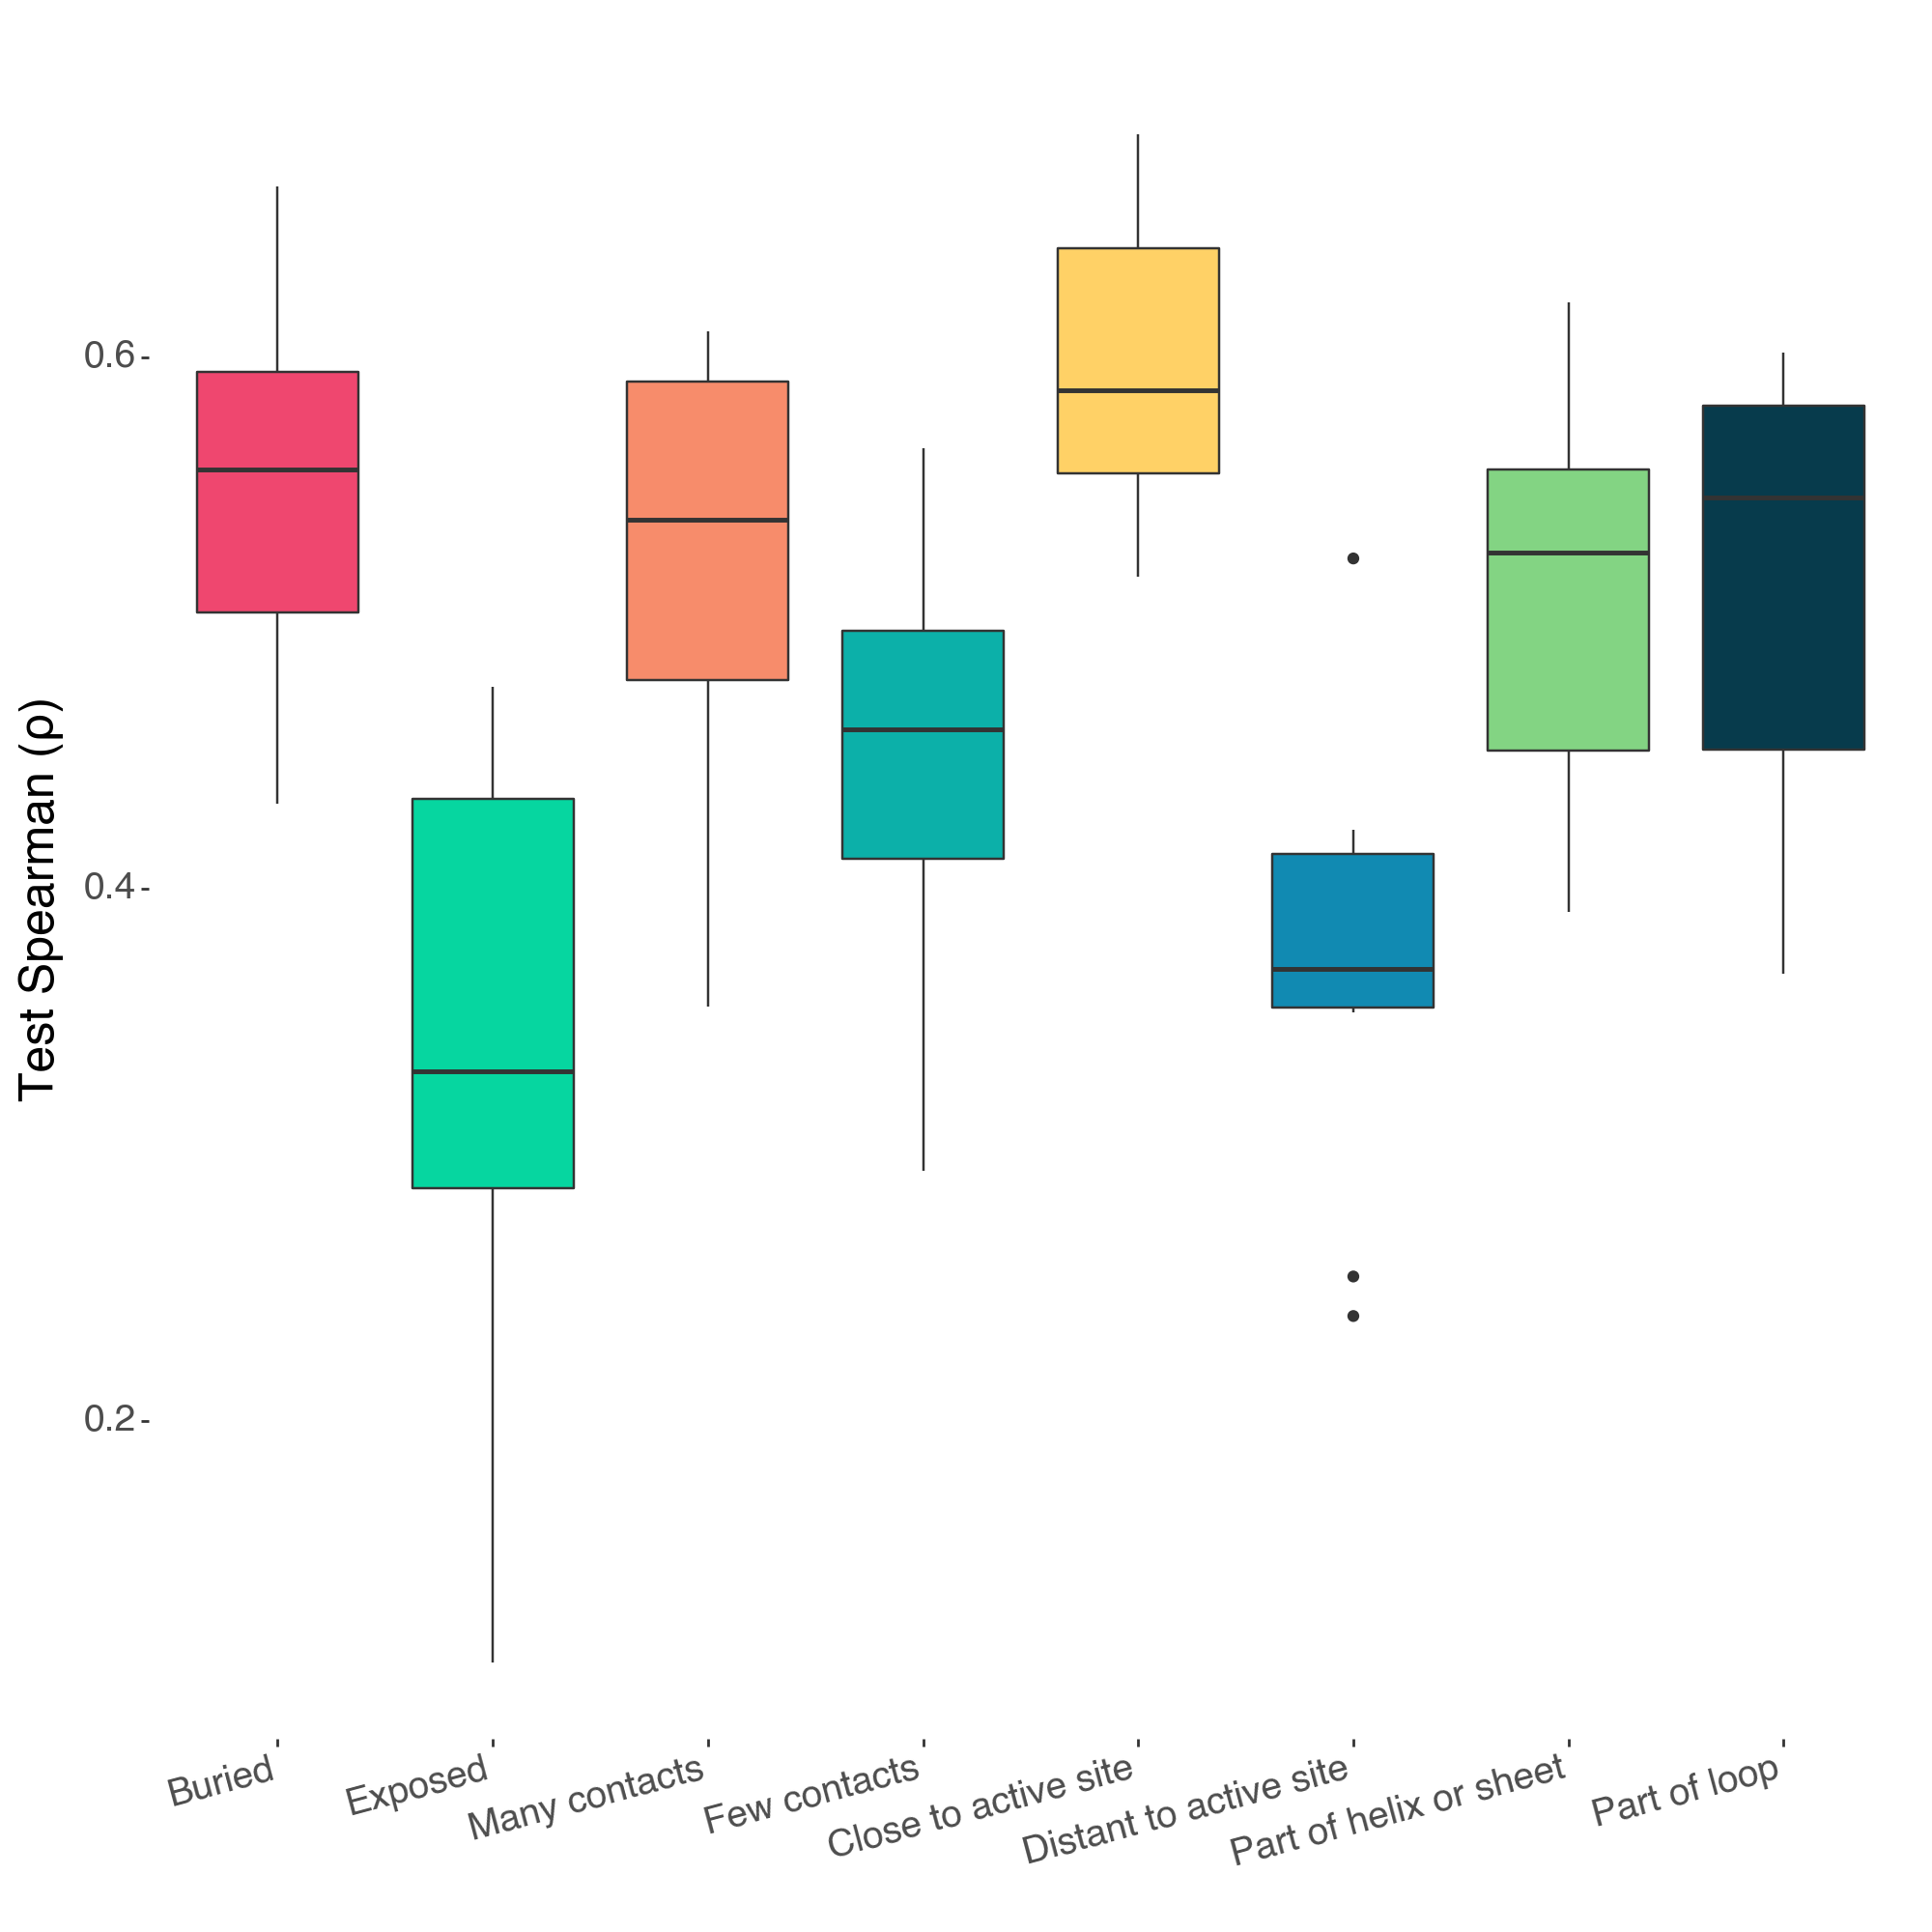

In [84]:
rita_results = singles_results[singles_results["model"] == "RITARegressor"]

p = (
    p9.ggplot(
        rita_results,
        p9.aes(
            "Structural characteristic",
            "Test spearman",
            fill="Structural characteristic",
        )
    )
    + p9.geom_boxplot(show_legend=False)
    + p9.theme(
        figure_size=(10, 10),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
        axis_title_x=p9.element_text(size=18),
        axis_text_x=p9.element_text(rotation=15, ha="right", size=14),
        axis_text_y=p9.element_text(size=14),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
    + p9.scale_fill_manual(values=color_mapping)
    + p9.labs(x="")
)
p.draw()
p.save(save_dir / "rita_sel_performance_difference.png")
print(p)

# erk2 all models

In [95]:
erk2_results_dir = PROJECT_ROOT / "results/erk2/singles"
erk2_results = pd.concat(
    [pd.read_csv(erk2_results_dir / f"{model_dir}/scores.csv", index_col=False) for model_dir in model_dirs]
)
erk2_results["belongs"] = erk2_results["belongs"].astype(bool)
erk2_results["Feature label"] = erk2_results["belongs"].apply(lambda x: "Negative" if x==False else "Positive")
erk2_results["Feature"] = erk2_results["feature"].apply(assign_pretty_feature_names)
erk2_results = erk2_results.rename(columns={"spearman_val": "Test spearman"})

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 10 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/sel_mk01_human_performance_difference.png


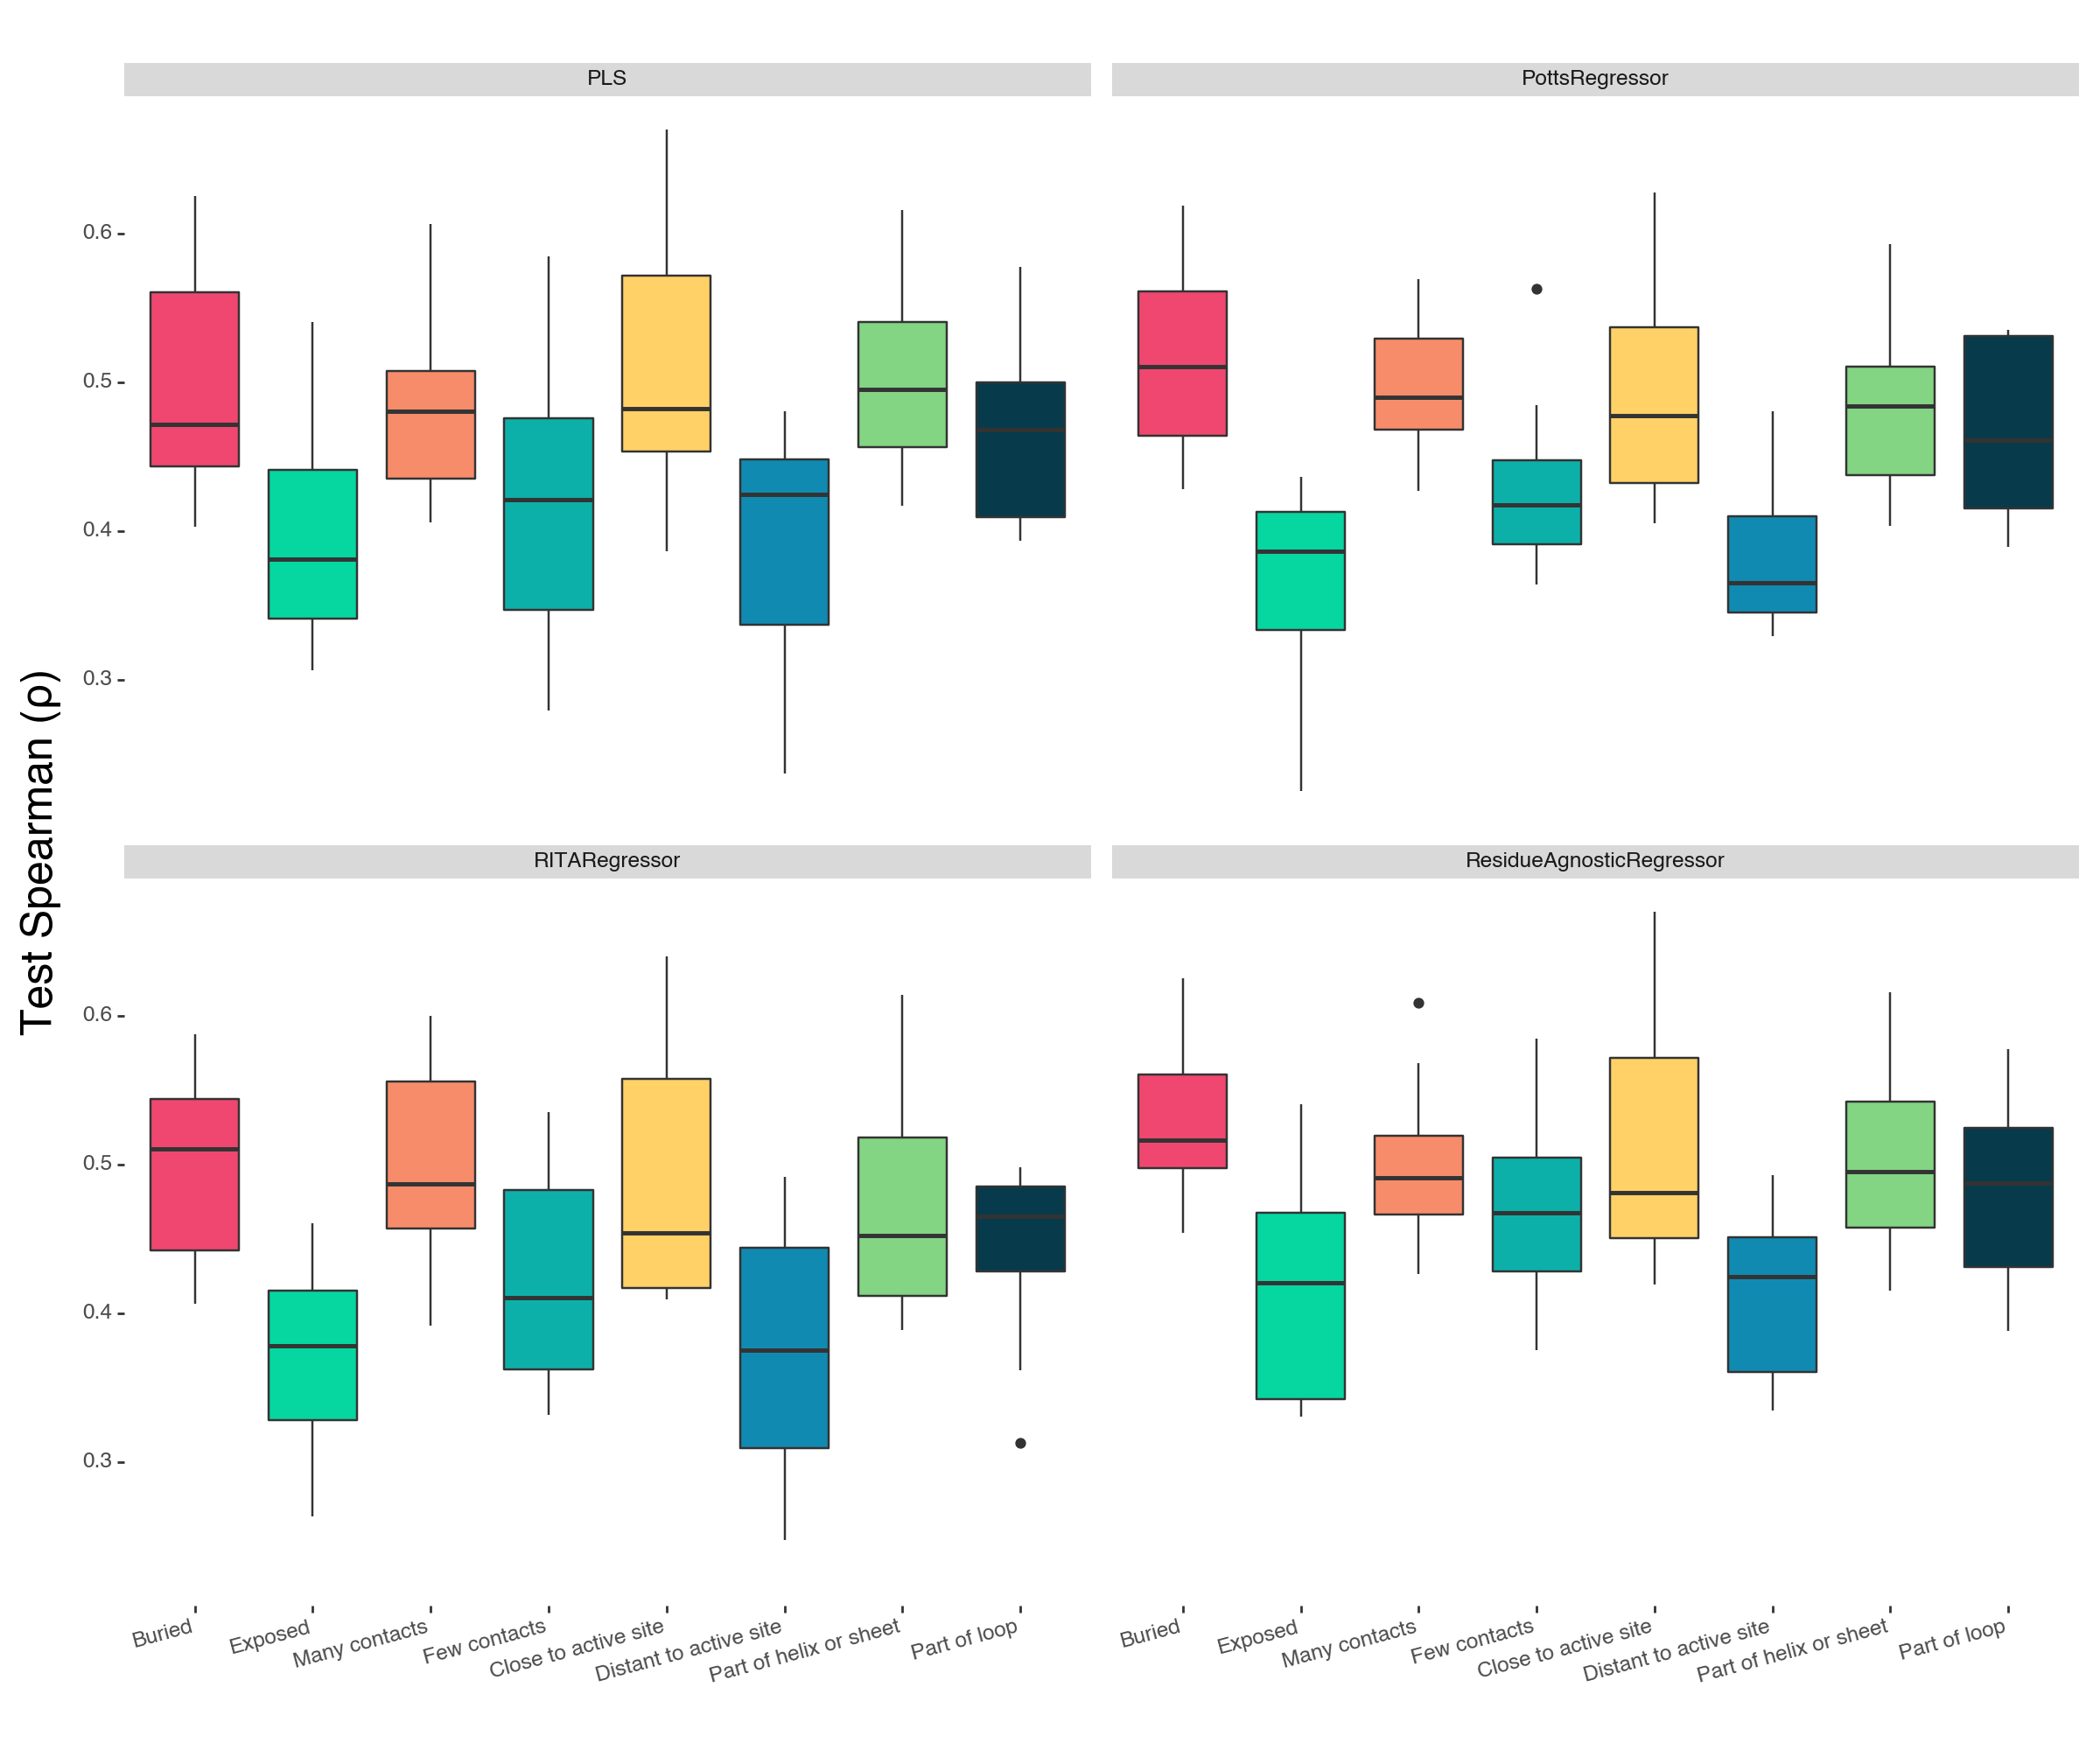

In [96]:
erk2_results["Structural characteristic"] = erk2_results[['Feature', 'Feature label']].apply(lambda x: feature_mapping[tuple(x)], axis=1)
erk2_results["Structural characteristic"] = pd.Categorical(erk2_results["Structural characteristic"],
                                                     categories=["Buried", "Exposed", "Many contacts", "Few contacts",
                                                                 "Close to active site", "Distant to active site",
                                                                 "Part of helix or sheet", "Part of loop"],
                                                     ordered=True)
p = (
    p9.ggplot(
        erk2_results,
        p9.aes(
            "Structural characteristic",
            "Test spearman",
            fill="Structural characteristic",
        )
    )
    + p9.geom_boxplot(show_legend=False)
    + p9.facet_wrap("model", nrow=2, ncol=2)
    + p9.theme(
        figure_size=(12, 10),
        axis_text_x=p9.element_text(rotation=15, ha="right"),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
    + p9.scale_fill_manual(values=color_mapping)
    + p9.labs(x="")
)
p.draw()
p.save(filename=save_dir / "sel_mk01_human_performance_difference.png")
print(p)

# Combis vs SEL (RITA only)

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 5 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/combis_vs_sel_performance_difference.png


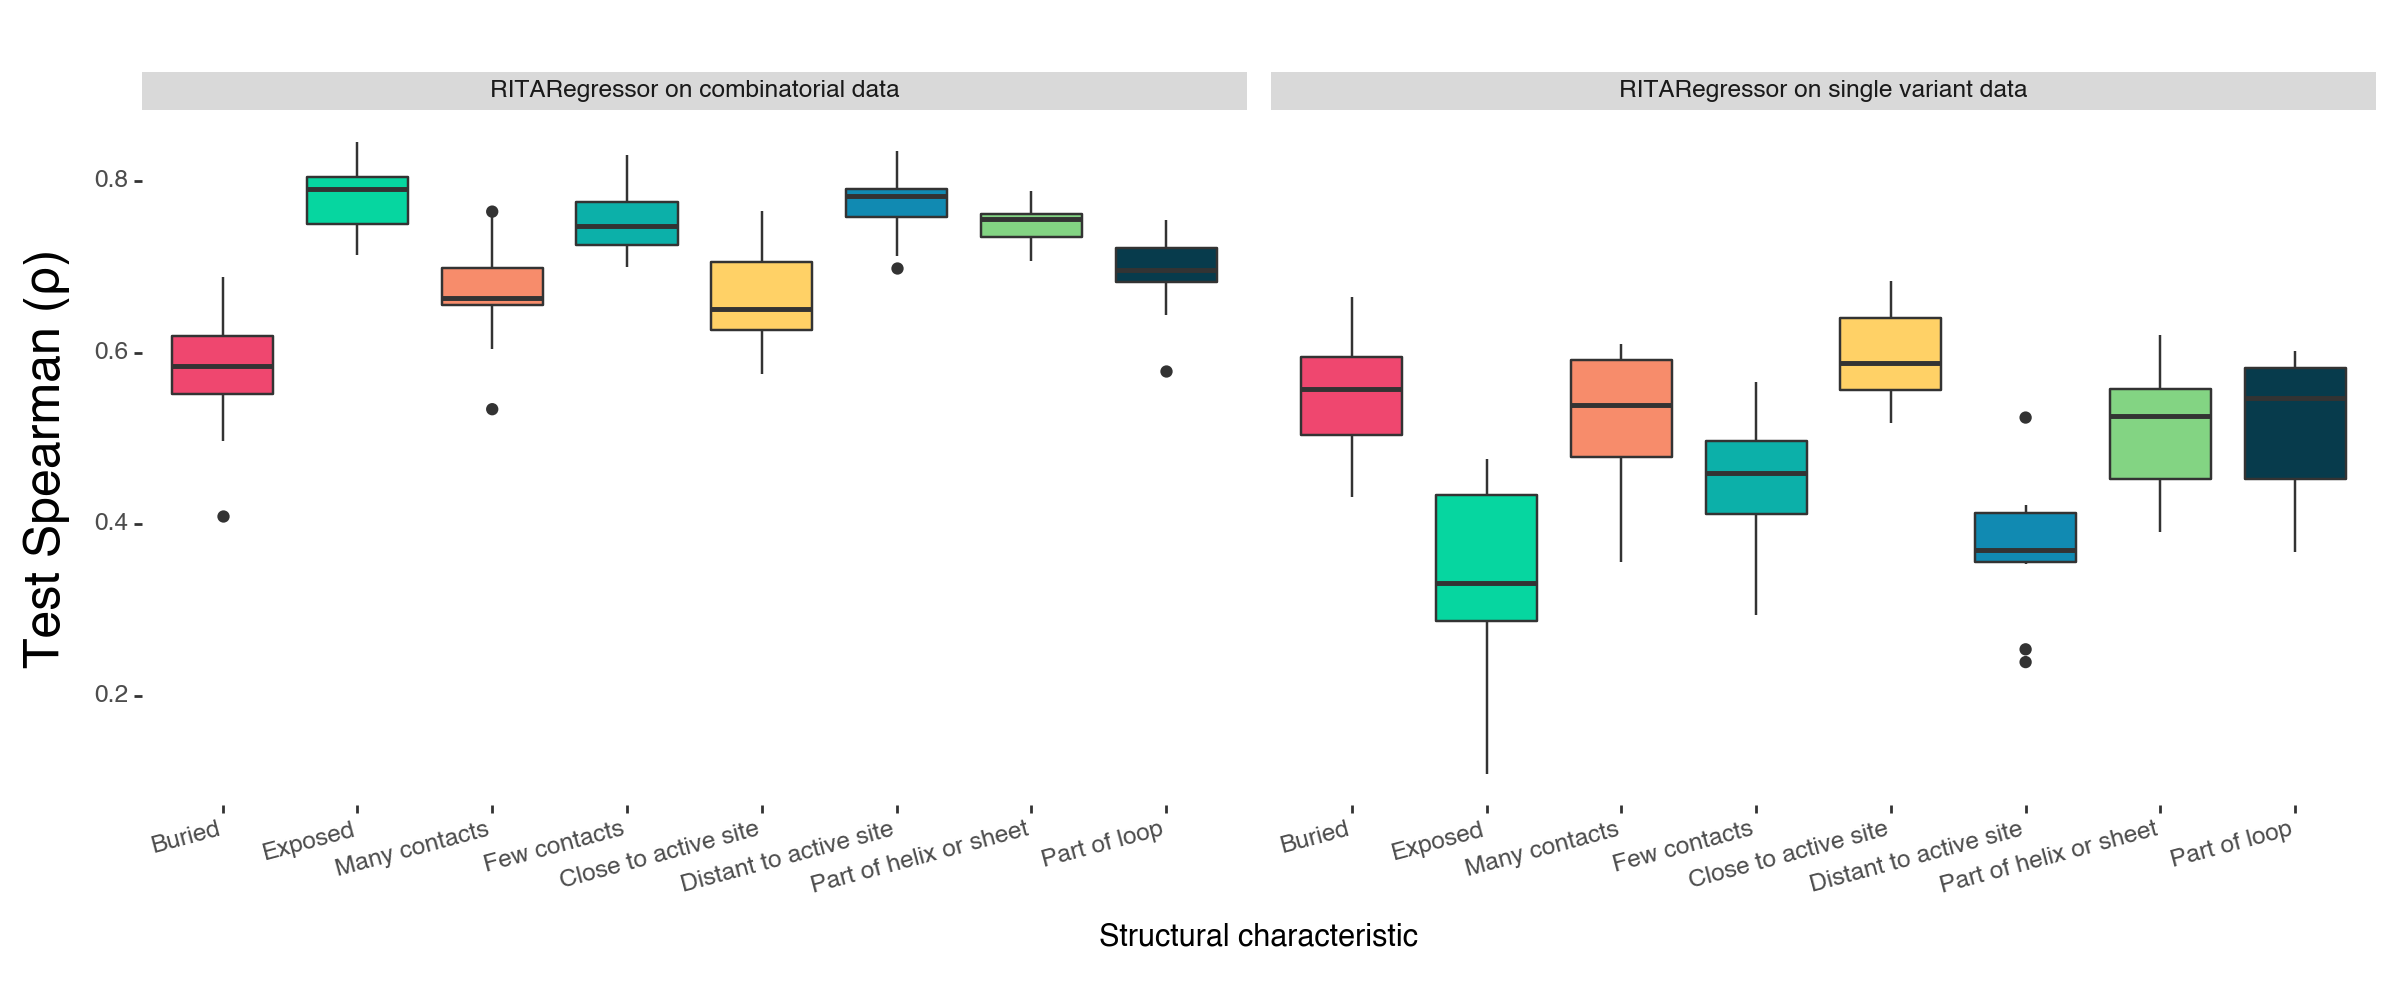

In [109]:
combis_df = combis_results[combis_results["model"] == "RITARegressor"].assign(
    model="RITARegressor on combinatorial data"
)
singles_df = singles_results[singles_results["model"] == "RITARegressor"].assign(
    model="RITARegressor on single variant data"
)
combis_singles_results = pd.concat([combis_df, singles_df])
p = (
    p9.ggplot(
        combis_singles_results,
        p9.aes(
            "Structural characteristic",
            "Test spearman",
            fill="Structural characteristic",
        )
    )
    + p9.geom_boxplot(show_legend=False)
    + p9.facet_wrap("model", ncol=2)
    + p9.theme(
        figure_size=(12, 5),
        axis_text_x=p9.element_text(rotation=15, ha="right"),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
    + p9.scale_fill_manual(values=color_mapping)
)
p.draw()
p.save(filename=save_dir / "combis_vs_sel_performance_difference.png")
print(p)

# Differences in stain activity compared by feature

In [42]:
data = pd.read_csv(DATA_ROOT / "amylase/combinatorials.csv")
df_long = pd.melt(data, id_vars=["sequence", "stain_activity"], value_vars=["is_buried", "is_connected", "is_secondary", "is_close_to_as"], var_name="Feature", value_name="Feature label")
df_long["Feature label"] = df_long["Feature label"].map(lambda x: ["Negative", "Positive"][x])
df_long["Feature"] = df_long["Feature"].map(assign_pretty_feature_names)
reference_stain_activity = data[data["sequence"] == amylase_reference]["stain_activity"]

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 2.5 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/stain_activity_difference.png


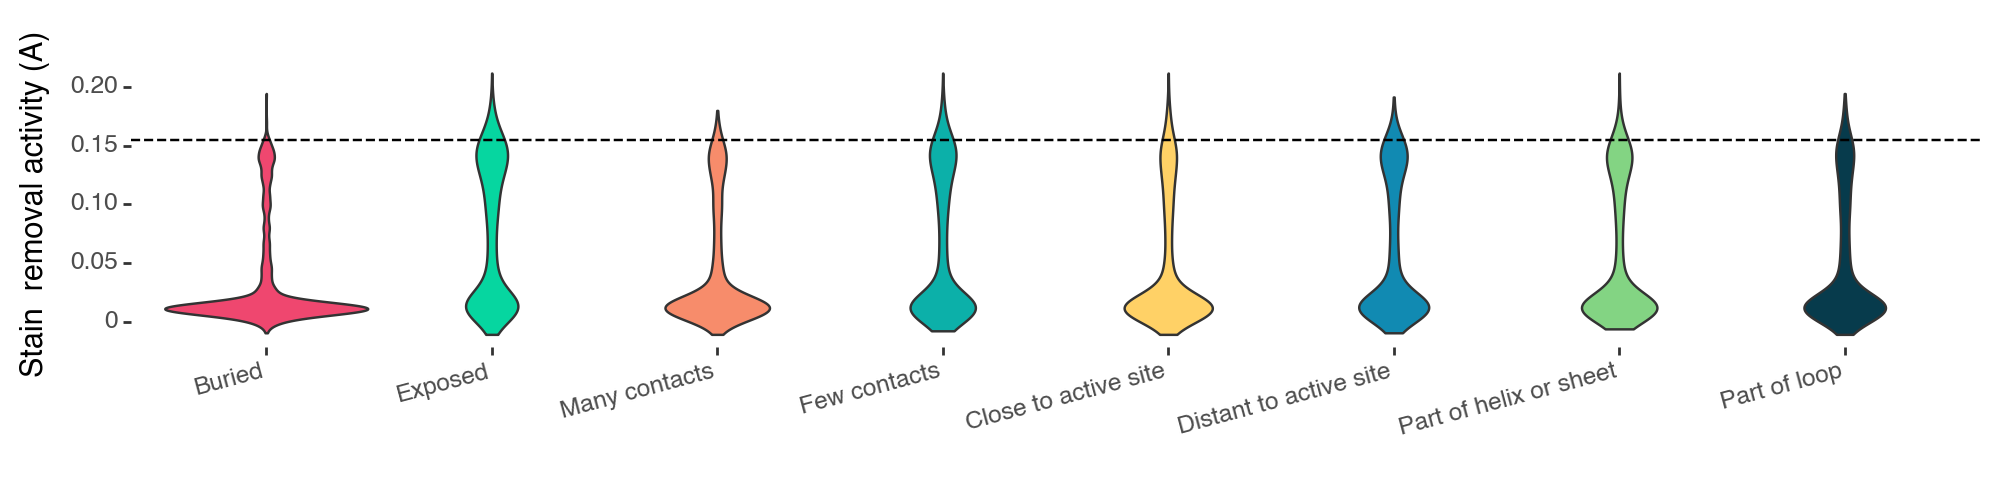

In [43]:
df_long["Structural characteristic"] = df_long[['Feature', 'Feature label']].apply(lambda x: feature_mapping[tuple(x)], axis=1)
df_long["Structural characteristic"] = pd.Categorical(df_long["Structural characteristic"],
                                                     categories=["Buried", "Exposed", "Many contacts", "Few contacts",
                                                                 "Close to active site", "Distant to active site",
                                                                 "Part of helix or sheet", "Part of loop"],
                                                     ordered=True)

# Add a new column to the dataframe to store the fill colors
df_long['Fill color'] = df_long["Structural characteristic"].apply(lambda x: color_mapping[x])

# Generate violin plots
p = (
    p9.ggplot(df_long, p9.aes(x="Structural characteristic", y='stain_activity', fill='Structural characteristic'))
    + p9.geom_violin(position=p9.position_dodge(width=0.9), show_legend=False)
    + p9.geom_hline(yintercept=reference_stain_activity, color="k", linetype="dashed")
    + p9.scale_fill_manual(values=color_mapping)
    + p9.theme(
        figure_size=(10, 2.5),
        axis_text_x=p9.element_text(rotation=15, ha="right"),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
    + p9.labs(x="", y='Stain  removal activity (A)')
)

p.save(filename=save_dir / "stain_activity_difference.png")
print(p)

# Dependence on residue information alone by extrapolation

In [110]:
potts_results = pd.read_csv(PROJECT_ROOT / "results/amylase/feature_utilization/potts/scores.csv", index_col=False).assign(model="PottsRegressor")
rita_results = pd.read_csv(PROJECT_ROOT / "results/amylase/feature_utilization/rita/scores.csv", index_col=False).assign(model="RITARegressor")
results_df = pd.concat([potts_results, rita_results]).rename(columns={"spearman_val": "Test spearman", "eval": "Evaluation method"})
results_df["Evaluation method"] = results_df["Evaluation method"].apply(lambda x: {"extrapolate": "Folds with mutations\n at new positions", "random": "Randomly sampled\n folds"}[x])

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 12 x 6 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/position_vs_other.png


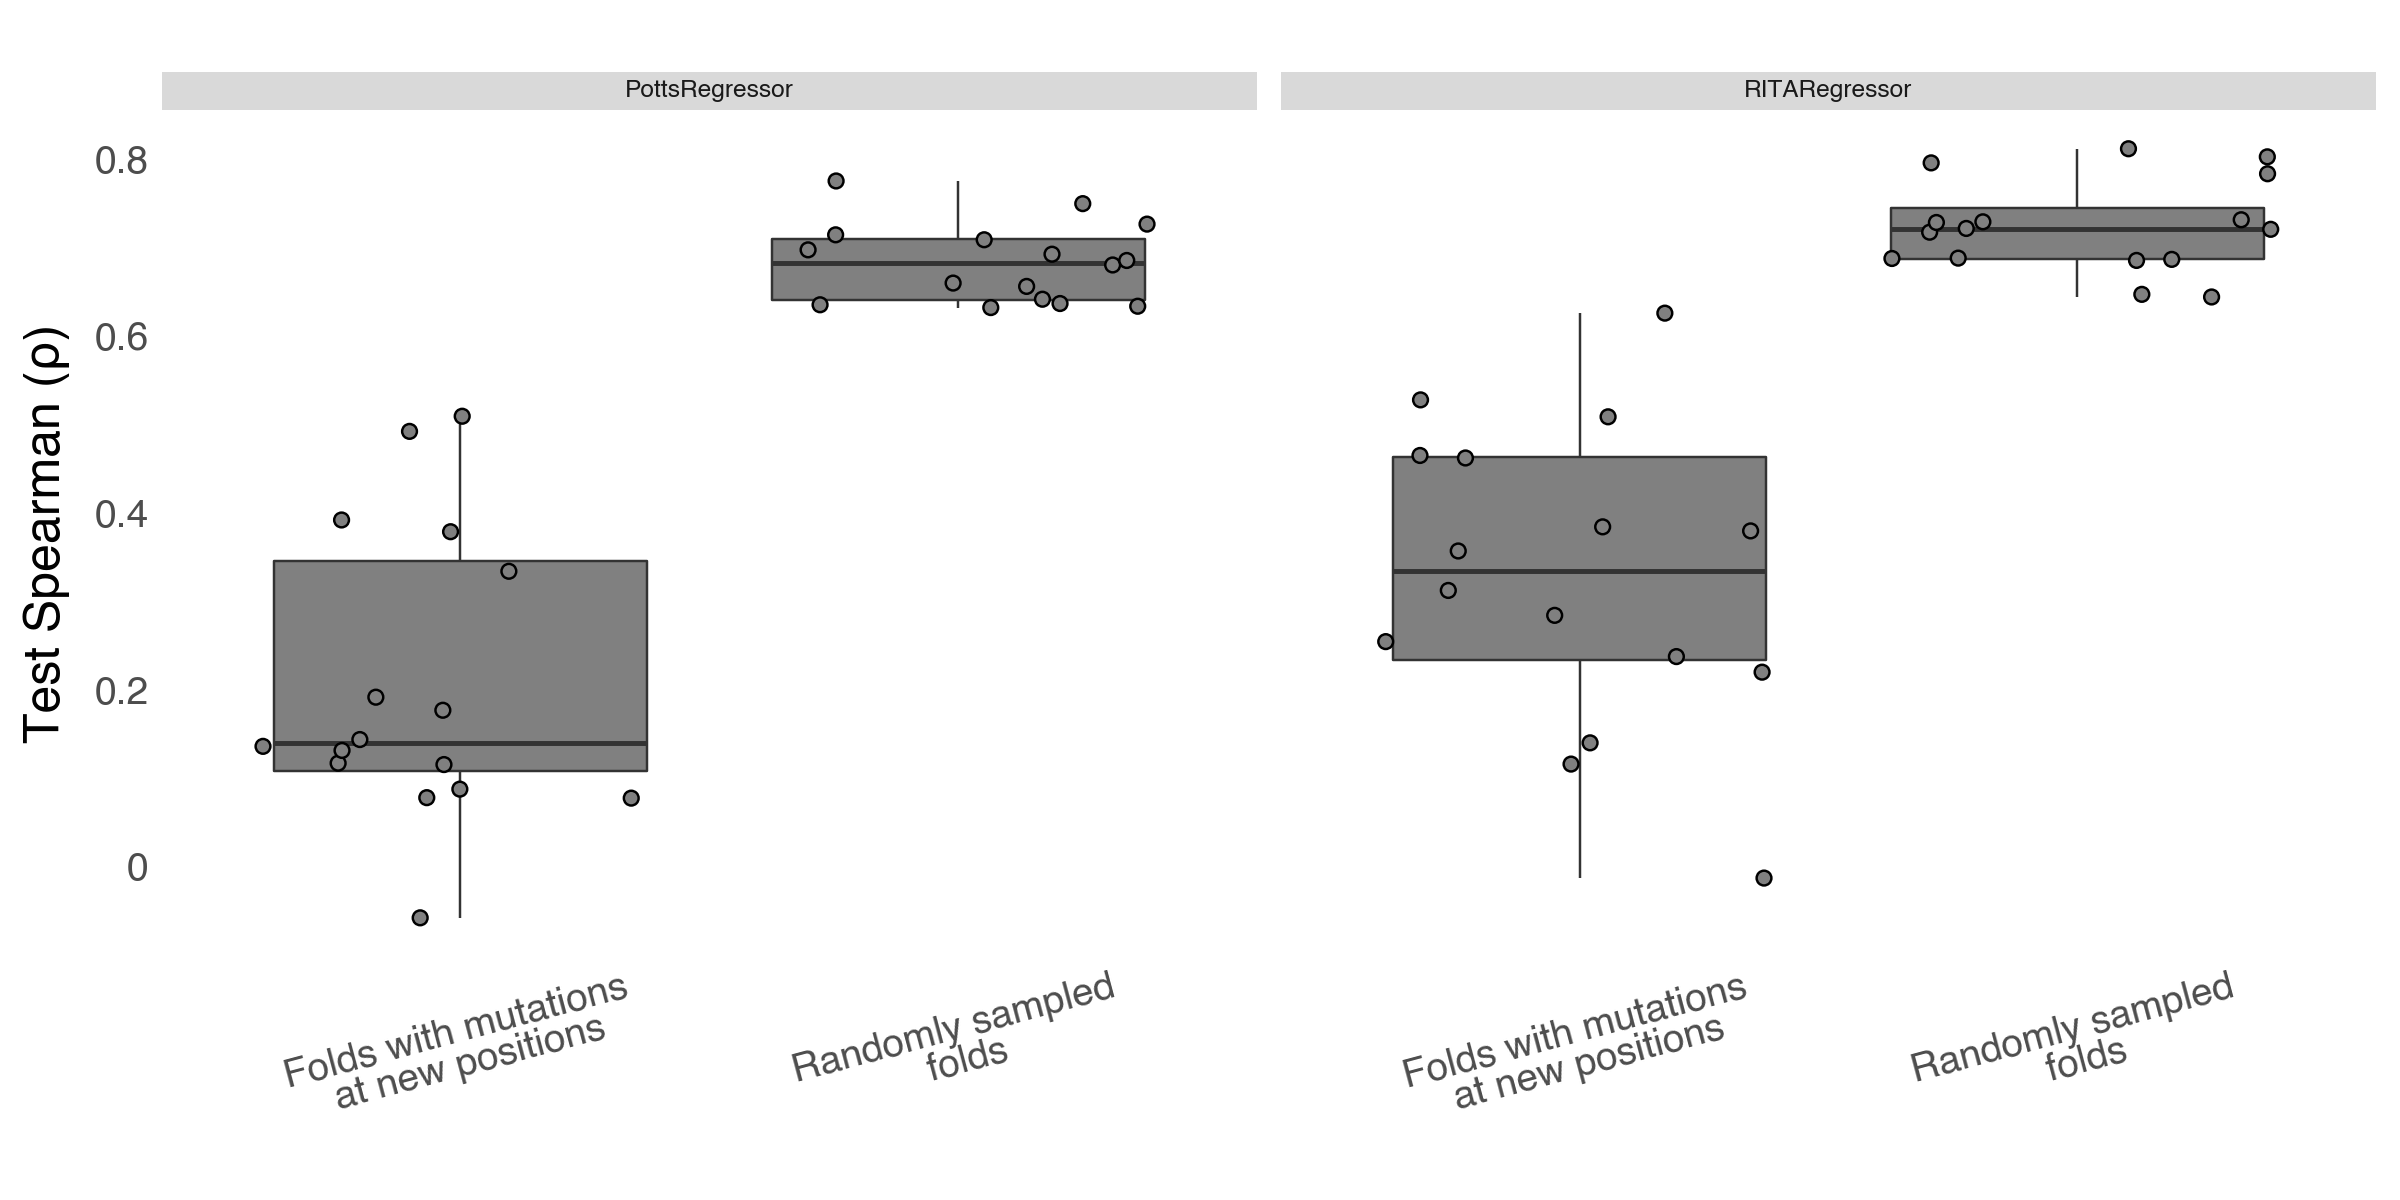

In [112]:
fill_color = "grey"
p = (
    p9.ggplot(
        results_df,
        p9.aes(
            x="Evaluation method",
            y="Test spearman",
            fill="Evaluation method",
        )
    )
    + p9.geom_boxplot(show_legend=False, fill=fill_color)
    + p9.geom_point(position="jitter", fill=fill_color, color="black", size=2.5, show_legend=False)
    + p9.facet_wrap("model", ncol=2)
    + p9.theme(
        figure_size=(12, 6),
        axis_text_x=p9.element_text(rotation=15, size=14),
        axis_text_y=p9.element_text(size=14),
        axis_title_x=p9.element_text(size=18),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
        axis_ticks=p9.element_blank(),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
    + p9.xlab("")
)
p.draw()
p.save(filename=save_dir / "position_vs_other.png")
print(p)

# RITA regressor only

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 6 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/rita_position_vs_other.png


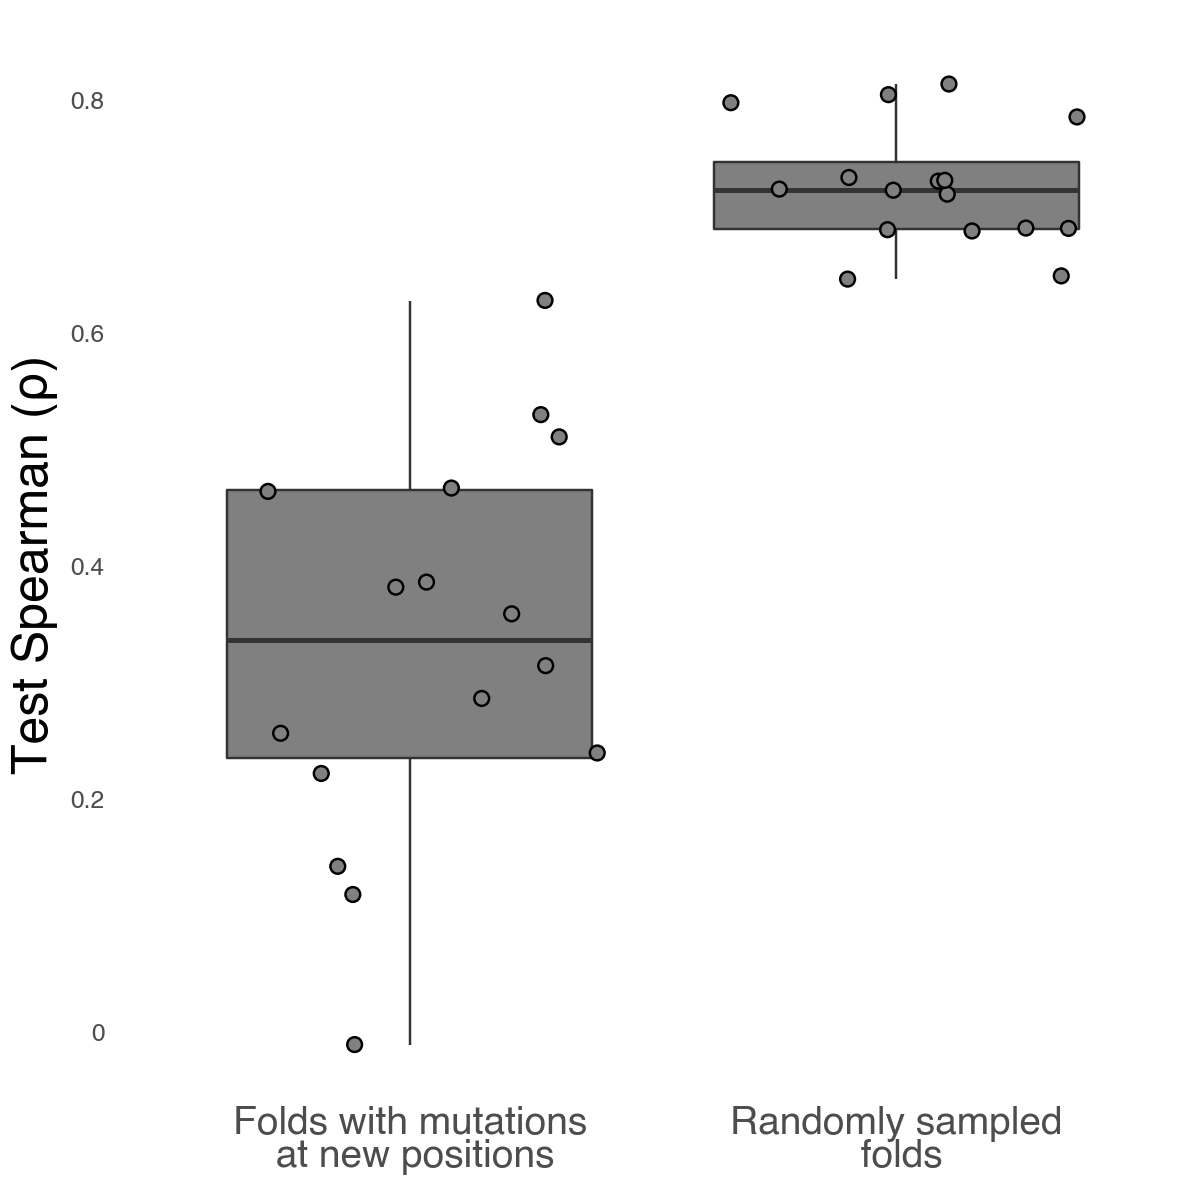

In [114]:
results_df = results_df[results_df["model"] == "RITARegressor"]
fill_color = "grey"
p = (
    p9.ggplot(
        results_df,
        p9.aes(
            x="Evaluation method",
            y="Test spearman",
            fill="Evaluation method",
        )
    )
    + p9.geom_boxplot(show_legend=False, fill=fill_color)
    + p9.geom_point(position="jitter", fill=fill_color, color="black", size=2.5, show_legend=False)
    + p9.theme(
        figure_size=(6, 6),
        axis_text_x=p9.element_text(size=14),
        axis_title_x=p9.element_blank(),
        axis_title_y=p9.element_text(text="Test Spearman (ρ)", size=18),
        axis_ticks=p9.element_blank(),
        plot_background=p9.element_rect(fill='white'),
        panel_background=p9.element_rect(fill='white')
    )
)
p.draw()
p.save(filename=save_dir / "rita_position_vs_other.png")
print(p)

# Visualization of structural characteristic distribution by bin

### WIP

# Supplementary figures

/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/floris/work/phd/projects/mutation-predictability/conda_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/floris/work/phd/projects/mutation-predictability/results/figures/levenshtein_distances.png


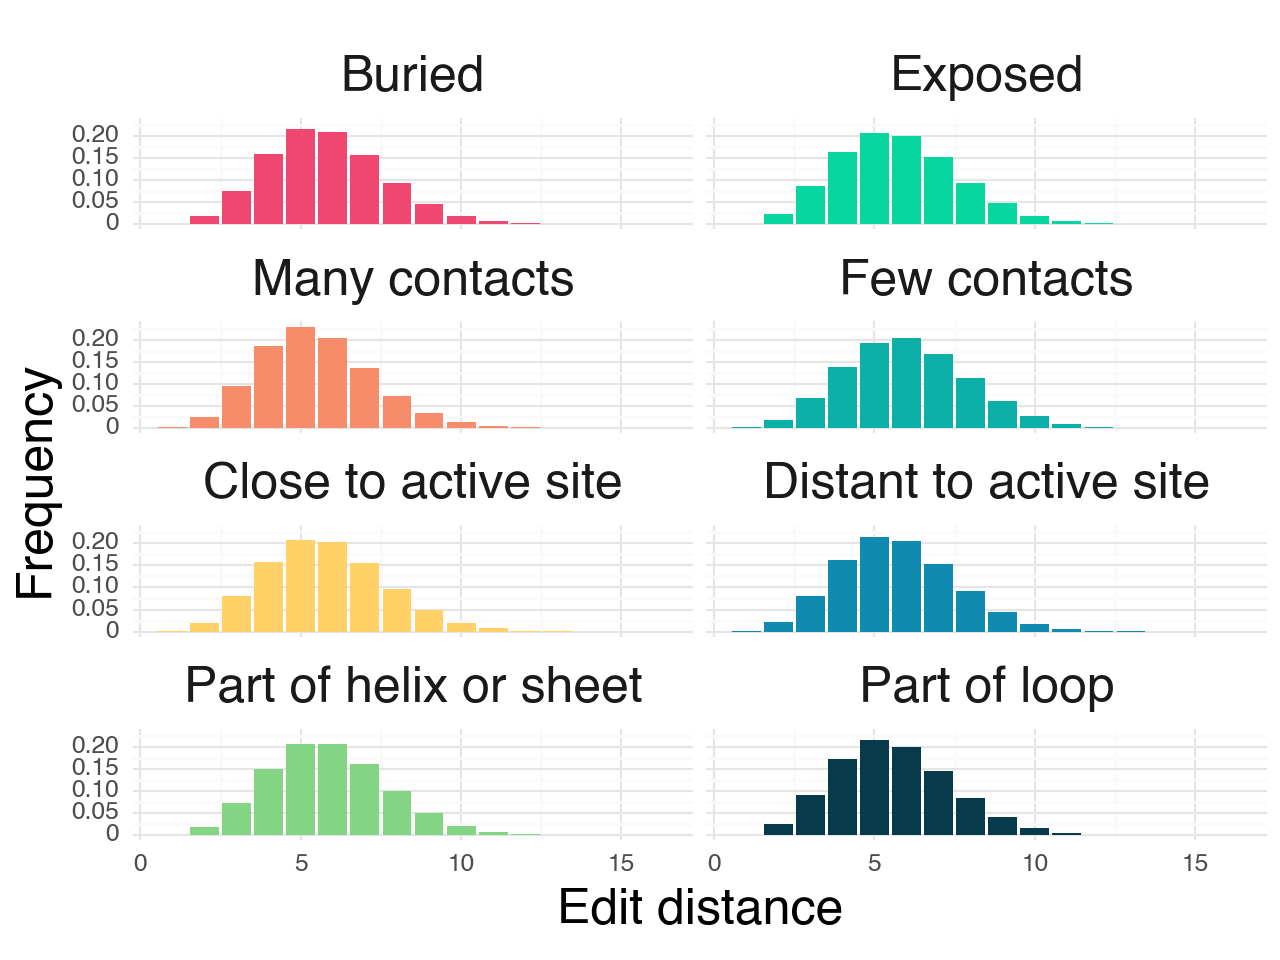

In [147]:
# Levenshtein distances
df = pd.read_csv(DATA_ROOT / "amylase/grouped_levenshtein_distances.csv")
df["Structural characteristic"] = pd.Categorical(df["Structural characteristic"],
                                                     categories=["Buried", "Exposed", "Many contacts", "Few contacts",
                                                                 "Close to active site", "Distant to active site",
                                                                 "Part of helix or sheet", "Part of loop"],
                                                     ordered=True)
df['Frequency'] = df.groupby('Structural characteristic')['Count'].transform(lambda x: x / x.sum())
p = (
    p9.ggplot(df, p9.aes(x='Levenshtein distance', y='Frequency', fill="Structural characteristic"))
    + p9.geom_bar(stat='identity', position='dodge', show_legend=False)
    + p9.facet_wrap('Structural characteristic', ncol=2)
    + p9.theme_minimal()
    + p9.theme(
        axis_title_x=p9.element_text(text="Edit distance", size=18),
        axis_title_y=p9.element_text(text="Frequency", size=18),
        strip_text=p9.element_text(size=18)
    )
    + p9.scale_fill_manual(values=color_mapping)
)
p.save(save_dir / "levenshtein_distances.png")
print(p)